<a href="https://colab.research.google.com/github/BateenaFaiz/Machine-Learning/blob/main/CISM623_Practical_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

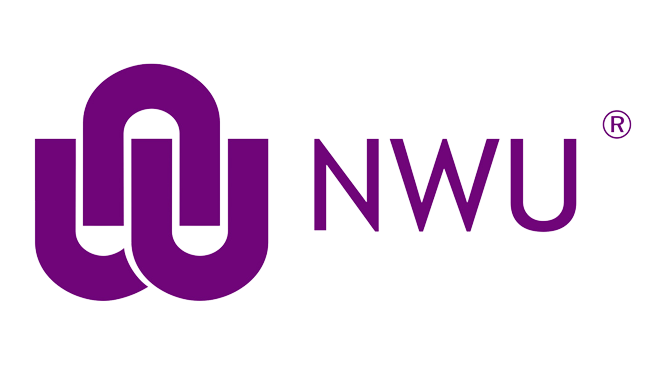

# **CISM 623: Machine Learning**

# **Student Details**

*   # Student Name and Surname: Shaikh Bateena
*   # University Number: 56107684


# Practical Lab 1

# CLASS: B.Sc Computer Science (HONS)

# DUE DATE: 11/ 08/ 2025 (Monday)


# Instructions: Answer all Questions


# **Problem Statement**
## The world population data spans from 1960 to 2017. We want to develop a prediction model that can provide the most accurate estimation of the current or historical population of a specific nation. Use the two CSV files to answer the questions.

# **Question 1**
## Create a function that accepts a **`country name`** as input and returns a dataframe with the `measured population` and the `year`.

In [1]:
import pandas as pd

countries_df = pd.read_csv('countries.csv')
population_df = pd.read_csv('world_population.csv')


In [2]:
def year_population(name_of_country):

    # Adding country names as a new column to the population dataframe
    df = population_df.copy()
    df['Country Name'] = countries_df['Country Name']

    # Filtering the data by the country name
    row = df[df['Country Name'] == name_of_country]

    # Dropping the Country Name column for reshaping
    row = row.drop(columns='Country Name')

    # Turning the columns into rows
    result = row.T.reset_index()
    result.columns = ['Year', 'Population']
    result['Year'] = result['Year'].astype(int)

    # Return the values
    return result



In [3]:
year_population("Angola")


,Year,Population
0,1960,5643182.0
1,1961,5753024.0
2,1962,5866061.0
3,1963,5980417.0
4,1964,6093321.0
5,1965,6203299.0
6,1966,6309770.0
7,1967,6414995.0
8,1968,6523791.0
9,1969,6642632.0


# **Question 2**
## We must first divide our data into predictive features (X) and the target (y) before dividing it into training and testing.

## ----------------------------------------------------------------------------------------------------------------------------------------------

## Write a function that will take a dataframe as input `(Question 1)` and return four variables in the form of `(X_train, y_train), (X_test, y_test)` which you will use to train and evaluate your model
## ----------------------------------------------------------------------------------------------------------------------------------------------

## `test_size = 0.2` and `random_state = 42`.

_**Use the results in Question 1 as Inputs:**_
```python
data = get_year_pop('Aruba')
data_split(data)
```
>

In [23]:
from sklearn.model_selection import train_test_split

# Storing the values from year_population into get_year_pop
get_year_pop = year_population

def data_split(dataframe):

    # Defining predictive and target variables
    X = dataframe[['Year']]
    y = dataframe['Population']

    # Dividing into training and testing
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Combining year & population for display
    train_data= pd.concat([X_train,y_train],axis=1)
    test_data= pd.concat([X_test,y_test],axis=1)

    # Displaying for sample to see it runs perfectly or not
    print("Train Data: \n",train_data.head())
    print("Test Data: \n",test_data.head())

    # Returns the values
    # return X_train, X_test, y_train, y_test
    return (X_train,y_train),(X_test,y_test)




In [24]:
data = get_year_pop("Aruba")
#X_train, X_test, y_train, y_test = data_split(data)
(X_train,y_train),(X_test,y_test) = data_split(data)


Train Data: 
     Year  Population
36  1996     83200.0
31  1991     64622.0
8   1968     58386.0
17  1977     60366.0
6   1966     57715.0
Test Data: 
     Year  Population
0   1960     54211.0
5   1965     57360.0
34  1994     76700.0
13  1973     60243.0
44  2004     98737.0


# **Question 3**
## Use the output from `data_split(df)` to fit a Linear regression model

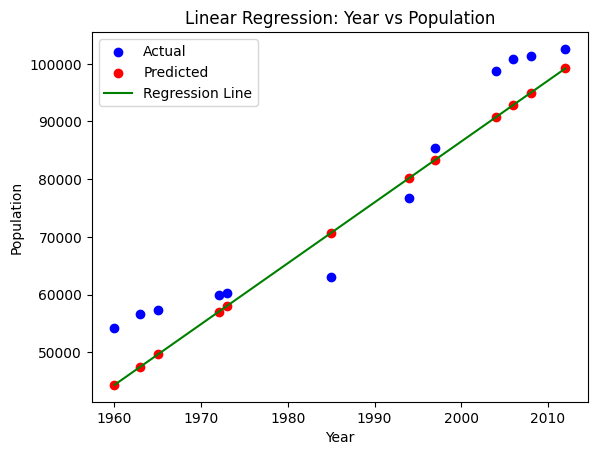

In [25]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Creating the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Scatter plot for actual values
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Scatter plot for predicted values
plt.scatter(X_test, y_pred, color='red', label='Predicted')

# Sorting by years for easy understanding
X_sorted = X_test.sort_values(by='Year')
plt.plot(X_sorted, model.predict(X_sorted), color='green', label='Regression Line')

# Giving labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Linear Regression: Year vs Population')
plt.legend()
plt.show()



# **Question 4**
Test your model using the testing data that was produced in Question 2. To use the `mean square error` as your performance metric.

Write a function that accepts the `model` in Question 3, and the `test data set` in Question 2

In [26]:
from sklearn.metrics import mean_squared_error

def test_model(model, X_train, y_train, X_test, y_test):

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculating MSE for the training dataset
    train_mse = mean_squared_error(y_train, y_train_pred)

    # Calculating MSE for the testing dataset
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Displaying MSE results
    print("Training Mean Squared Error:", train_mse)
    print("Testing Mean Squared Error:", test_mse)

    # Return the values
    return train_mse, test_mse




In [28]:
train_mse, test_mse = test_model(model, X_train, y_train, X_test, y_test)


Training Mean Squared Error: 45383295.28436149
Testing Mean Squared Error: 42488189.31634962
